### Red Wine Quality Prediction Project

In [3]:
#Importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv(r"C:\Users\lenovo\Downloads\winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape

(1599, 12)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
#Any missing values ?
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Correlation between features and label

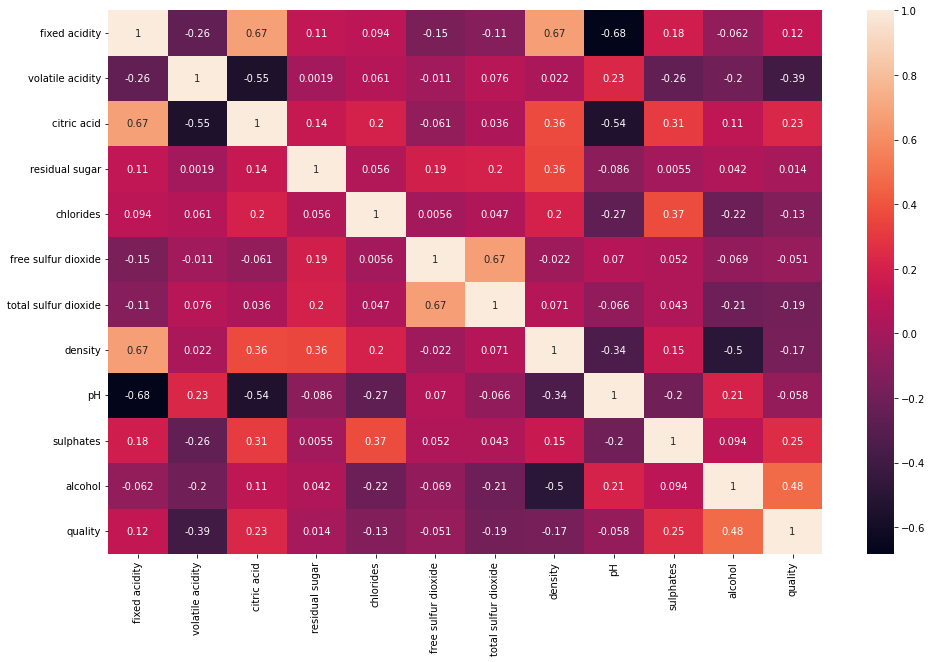

In [12]:
#To find relationship between features and label and multicolinearity if present.
df_corr=data.corr() #coefficent of one variale vs other variables
plt.figure(figsize=(16,10))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

In [13]:
#Seems like free sulpher dioxide and total sulfur dioxide ,fixed acidity and density ,citric acid and fixed acidity are correlated as per heatmap
#lets see more more prrof

##### Scatter plot for confirming multicolinearity

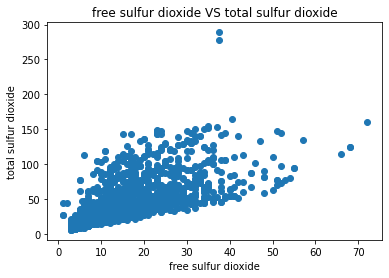

In [16]:
#for free sulpher dioxide and total sulfur dioxide
plt.scatter(data['free sulfur dioxide'],data['total sulfur dioxide'])
plt.xlabel('free sulfur dioxide')
plt.ylabel('total sulfur dioxide')
plt.title('free sulfur dioxide VS total sulfur dioxide')
plt.show()

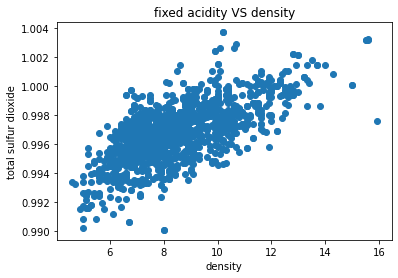

In [19]:
#for fixed acidity and density
plt.scatter(data['fixed acidity'],data['density'])
plt.xlabel('density')
plt.ylabel('total sulfur dioxide')
plt.title('fixed acidity VS density')
plt.show()

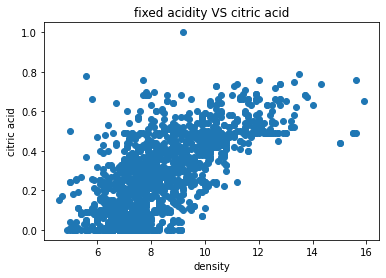

In [21]:
#for fixed acidity and citric acid
plt.scatter(data['fixed acidity'],data['citric acid'])
plt.xlabel('density')
plt.ylabel('citric acid')
plt.title('fixed acidity VS citric acid')
plt.show()

In [31]:
#All the three above scatter plots we can see trend of increasing
#So we are going to delete one of them 
#From heatmap which have strong correlation with quality(klabel) we wll keep that
#So we ar going to delete total sulfur dioxide and density
x=data.drop(['quality','total sulfur dioxide','density'],axis=1)
y=data['quality']

##### Spliting data

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)

##### Function for Accuracy

In [33]:
#write one function and call as many as times to check accuracy score at different models
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train :
        y_pred=clf.predict(x_train)
        print('----------------Train Result----------------')
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)}")
    
    if train == False:
        pred=clf.predict(x_test)
        print('----------------Test Result----------------')
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print('\n\nTest Classification Report\n',classification_report(y_test,pred,digits=2))

##### Model Initiation

In [34]:
#Model Initiation
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
#Call the function and pass dataset to check train and test score
metric_score(clf,x_train,x_test,y_train,y_test,train=True) #Traning score

metric_score(clf,x_train,x_test,y_train,y_test,train=False) #Testing Score

----------------Train Result----------------
Accuracy Score:1.0
----------------Test Result----------------
Accuracy Score:56.00%


Test Classification Report
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.14      0.12        14
           5       0.67      0.61      0.64       176
           6       0.52      0.59      0.55       151
           7       0.60      0.48      0.53        52
           8       0.00      0.00      0.00         6

    accuracy                           0.56       400
   macro avg       0.32      0.30      0.31       400
weighted avg       0.57      0.56      0.56       400



##### Confusion matrix

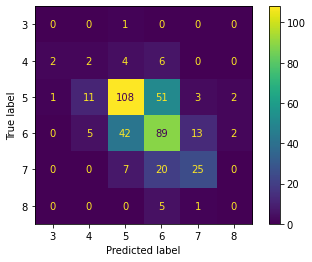

In [51]:
#Lets see the Confusion matrix
from sklearn import metrics
metrics.plot_confusion_matrix(clf, x_test, y_test)
plt.show()

In [55]:
data['best quality'] = [1 if x > 5 else 0 for x in data.quality]
data['best quality']

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: best quality, Length: 1599, dtype: int64

In [56]:
#We are tunning four important parameters
grid_param={'criterion':['gini','entrophy'],
           'max_depth':range(15,20),
           'min_samples_leaf':range(6,10),
           'min_samples_split':range(8,14),
           'max_leaf_nodes':range(10,15)}

In [57]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)

In [58]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': range(15, 20),
                         'max_leaf_nodes': range(10, 15),
                         'min_samples_leaf': range(6, 10),
                         'min_samples_split': range(8, 14)})

In [65]:
best_parameters=grid_search.best_params_
best_parameters


{'criterion': 'gini',
 'max_depth': 15,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 8}

In [76]:
clf=DecisionTreeClassifier(criterion= 'gini',
 max_depth= 15,
 max_leaf_nodes= 10,
 min_samples_leaf= 6,
 min_samples_split= 8)

In [77]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=10, min_samples_leaf=6,
                       min_samples_split=8)

In [78]:
#Call the function and pass dataset to check train and test score
metric_score(clf,x_train,x_test,y_train,y_test,train=True) #Traning score

metric_score(clf,x_train,x_test,y_train,y_test,train=False) #Testing Score

----------------Train Result----------------
Accuracy Score:0.628023352793995
----------------Test Result----------------
Accuracy Score:58.25%


Test Classification Report
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        14
           5       0.66      0.71      0.69       176
           6       0.51      0.61      0.56       151
           7       0.48      0.31      0.38        52
           8       0.00      0.00      0.00         6

    accuracy                           0.58       400
   macro avg       0.28      0.27      0.27       400
weighted avg       0.55      0.58      0.56       400



In [79]:
#As we can see by tuning  From the above accuracies we can say that DecisionTreeClassifier performing better
#on the validation data with less difference between the predicting and training data

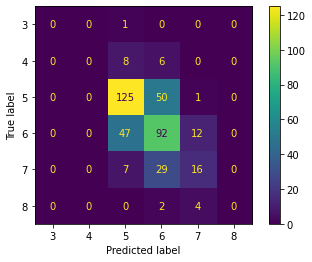

In [80]:
#Lets see the Confusion matrix
from sklearn import metrics
metrics.plot_confusion_matrix(clf, x_test, y_test)
plt.show()